In [2]:
# Packages 
import pandas as pd
import numpy as np

# Visualization Packages
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pyo
import plotly.figure_factory as ff
import folium
from folium.plugins import HeatMap
import plotly.io as pi
pi.renderers.default = "colab" 
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
pyo.init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")


# **Listings** 

## **Data Cleaning**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#import dataset 
path_ps = '/content/drive/MyDrive/DataSets/AirBnb/listings.csv'
listings_df = pd.read_csv(path_ps, usecols=['id','name','host_id','host_name','neighbourhood_group','neighbourhood','latitude','longitude','room_type','price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365'])
listings_df.head(5) 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,45558745,FLH Baixa-Chiado Library Loft,3953109,Feels Like Home,Lisboa,Santa Maria Maior,38.710320,-9.138140,Entire home/apt,161,1,28,2023-03-07,1.32,306,288
1,33179882,Palm Guesthouse,152854735,Luis,Cascais,Cascais e Estoril,38.699930,-9.421570,Private room,81,5,0,NaN,NaN,5,290
2,836176843011037443,"Lisbon, renewed T1 apartment with pateo near M...",185689002,GAL - Gestão De Alojamento Local,Lisboa,Arroios,38.720987,-9.137193,Entire home/apt,94,1,0,NaN,NaN,20,262
3,1199811,Best Deal Lisboa Alfama Fado apart.,6552656,Francisco,Lisboa,Santa Maria Maior,38.710540,-9.130080,Entire home/apt,77,3,264,2023-03-16,2.31,1,255
4,26093410,Santa Liberdade Flat - Liberdade Avenue at Lisbon,348308512,Margarida,Lisboa,Santo Antnio,38.720410,-9.144350,Entire home/apt,110,3,1,2019-09-15,0.02,4,0


In [5]:
listings_df.shape

(20097, 16)

In [6]:
listings_df.ndim

2

In [7]:
listings_df.info

<bound method DataFrame.info of                        id                                               name  \
0                45558745                     FLH  Baixa-Chiado Library Loft   
1                33179882                                    Palm Guesthouse   
2      836176843011037443  Lisbon, renewed T1 apartment with pateo near M...   
3                 1199811                Best Deal Lisboa Alfama Fado apart.   
4                26093410  Santa Liberdade Flat - Liberdade Avenue at Lisbon   
...                   ...                                                ...   
20092            44304902                                     Avenida Olaias   
20093            23587725                  TERRACE WITH RIVER VIEW *1BD APT*   
20094            19755044    Flea Market ALFAMA house (PATIO/POOL/AC/GARAGE)   
20095            46078981       GuestReady - Bright and Modern Apt in Lisbon   
20096            44428926                                     Parrot´s House   

       

In [8]:
listings_df.describe

<bound method NDFrame.describe of                        id                                               name  \
0                45558745                     FLH  Baixa-Chiado Library Loft   
1                33179882                                    Palm Guesthouse   
2      836176843011037443  Lisbon, renewed T1 apartment with pateo near M...   
3                 1199811                Best Deal Lisboa Alfama Fado apart.   
4                26093410  Santa Liberdade Flat - Liberdade Avenue at Lisbon   
...                   ...                                                ...   
20092            44304902                                     Avenida Olaias   
20093            23587725                  TERRACE WITH RIVER VIEW *1BD APT*   
20094            19755044    Flea Market ALFAMA house (PATIO/POOL/AC/GARAGE)   
20095            46078981       GuestReady - Bright and Modern Apt in Lisbon   
20096            44428926                                     Parrot´s House   

     

In [9]:
listings_df.corr

<bound method DataFrame.corr of                        id                                               name  \
0                45558745                     FLH  Baixa-Chiado Library Loft   
1                33179882                                    Palm Guesthouse   
2      836176843011037443  Lisbon, renewed T1 apartment with pateo near M...   
3                 1199811                Best Deal Lisboa Alfama Fado apart.   
4                26093410  Santa Liberdade Flat - Liberdade Avenue at Lisbon   
...                   ...                                                ...   
20092            44304902                                     Avenida Olaias   
20093            23587725                  TERRACE WITH RIVER VIEW *1BD APT*   
20094            19755044    Flea Market ALFAMA house (PATIO/POOL/AC/GARAGE)   
20095            46078981       GuestReady - Bright and Modern Apt in Lisbon   
20096            44428926                                     Parrot´s House   

       

In [10]:
listings_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

<Axes: >

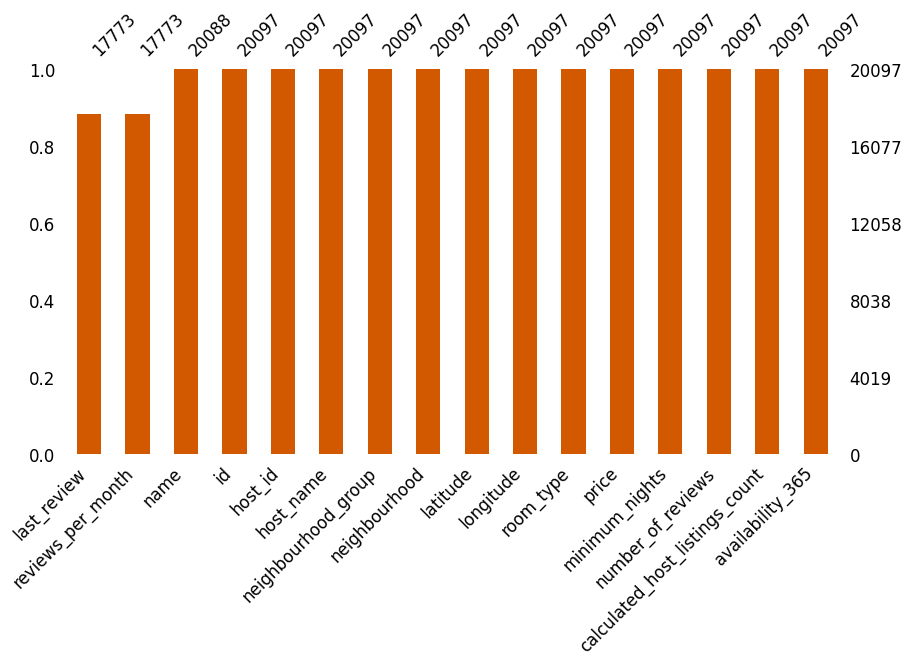

In [11]:
# missing data overview
missing = listings_df.isna().sum()
missing
msno.bar(listings_df, color="#d25900", sort="ascending", figsize=(10,5), fontsize=12)

In [12]:
#drop useless variables
drop_list = ['name','host_name','last_review']
listings_df.drop(listings_df[drop_list], axis=1, inplace=True)
listings_df.head(5)

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,45558745,3953109,Lisboa,Santa Maria Maior,38.710320,-9.138140,Entire home/apt,161,1,28,1.32,306,288
1,33179882,152854735,Cascais,Cascais e Estoril,38.699930,-9.421570,Private room,81,5,0,NaN,5,290
2,836176843011037443,185689002,Lisboa,Arroios,38.720987,-9.137193,Entire home/apt,94,1,0,NaN,20,262
3,1199811,6552656,Lisboa,Santa Maria Maior,38.710540,-9.130080,Entire home/apt,77,3,264,2.31,1,255
4,26093410,348308512,Lisboa,Santo Antnio,38.720410,-9.144350,Entire home/apt,110,3,1,0.02,4,0


In [13]:
#checking listings_df1 information after dropping useless variables 
listings_df.info()
listings_df.shape
missing1 = listings_df.isna().sum()
missing1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20097 entries, 0 to 20096
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20097 non-null  int64  
 1   host_id                         20097 non-null  int64  
 2   neighbourhood_group             20097 non-null  object 
 3   neighbourhood                   20097 non-null  object 
 4   latitude                        20097 non-null  float64
 5   longitude                       20097 non-null  float64
 6   room_type                       20097 non-null  object 
 7   price                           20097 non-null  int64  
 8   minimum_nights                  20097 non-null  int64  
 9   number_of_reviews               20097 non-null  int64  
 10  reviews_per_month               17773 non-null  float64
 11  calculated_host_listings_count  20097 non-null  int64  
 12  availability_365                

id                                   0
host_id                              0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 2324
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [14]:
#dropping missing values
listings_df1 = listings_df.dropna()
missing2 = listings_df1.isna().sum()
missing2

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [15]:
#checking number of rows and columns after removing missing values
listings_df1.shape

(17773, 13)

## EDA

In [16]:
listings_df1.describe

<bound method NDFrame.describe of              id    host_id neighbourhood_group      neighbourhood  latitude  \
0      45558745    3953109              Lisboa  Santa Maria Maior  38.71032   
3       1199811    6552656              Lisboa  Santa Maria Maior  38.71054   
4      26093410  348308512              Lisboa       Santo Antnio  38.72041   
5      30153845  213556525              Lisboa         So Vicente  38.71433   
6       1090171    4043364              Lisboa  Santa Maria Maior  38.71206   
...         ...        ...                 ...                ...       ...   
20092  44304902  285679616              Lisboa              Beato  38.73506   
20093  23587725  176228709              Lisboa         So Vicente  38.72026   
20094  19755044  105282390              Lisboa         So Vicente  38.71873   
20095  46078981  402191311              Lisboa            Arroios  38.72288   
20096  44428926   31572637               Mafra           Ericeira  38.96416   

       longitude 

In [17]:
#numeric data information [M]
numeric_features = listings_df1.select_dtypes(include=['int64','float64']).columns
numeric_features

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [18]:
#nominaldata information [M]
nominal_features = listings_df1.select_dtypes(include=['object'])
nominal_features

,neighbourhood_group,neighbourhood,room_type
0,Lisboa,Santa Maria Maior,Entire home/apt
3,Lisboa,Santa Maria Maior,Entire home/apt
4,Lisboa,Santo Antnio,Entire home/apt
5,Lisboa,So Vicente,Entire home/apt
6,Lisboa,Santa Maria Maior,Entire home/apt
...,...,...,...
20092,Lisboa,Beato,Entire home/apt
20093,Lisboa,So Vicente,Entire home/apt
20094,Lisboa,So Vicente,Entire home/apt
20095,Lisboa,Arroios,Entire home/apt


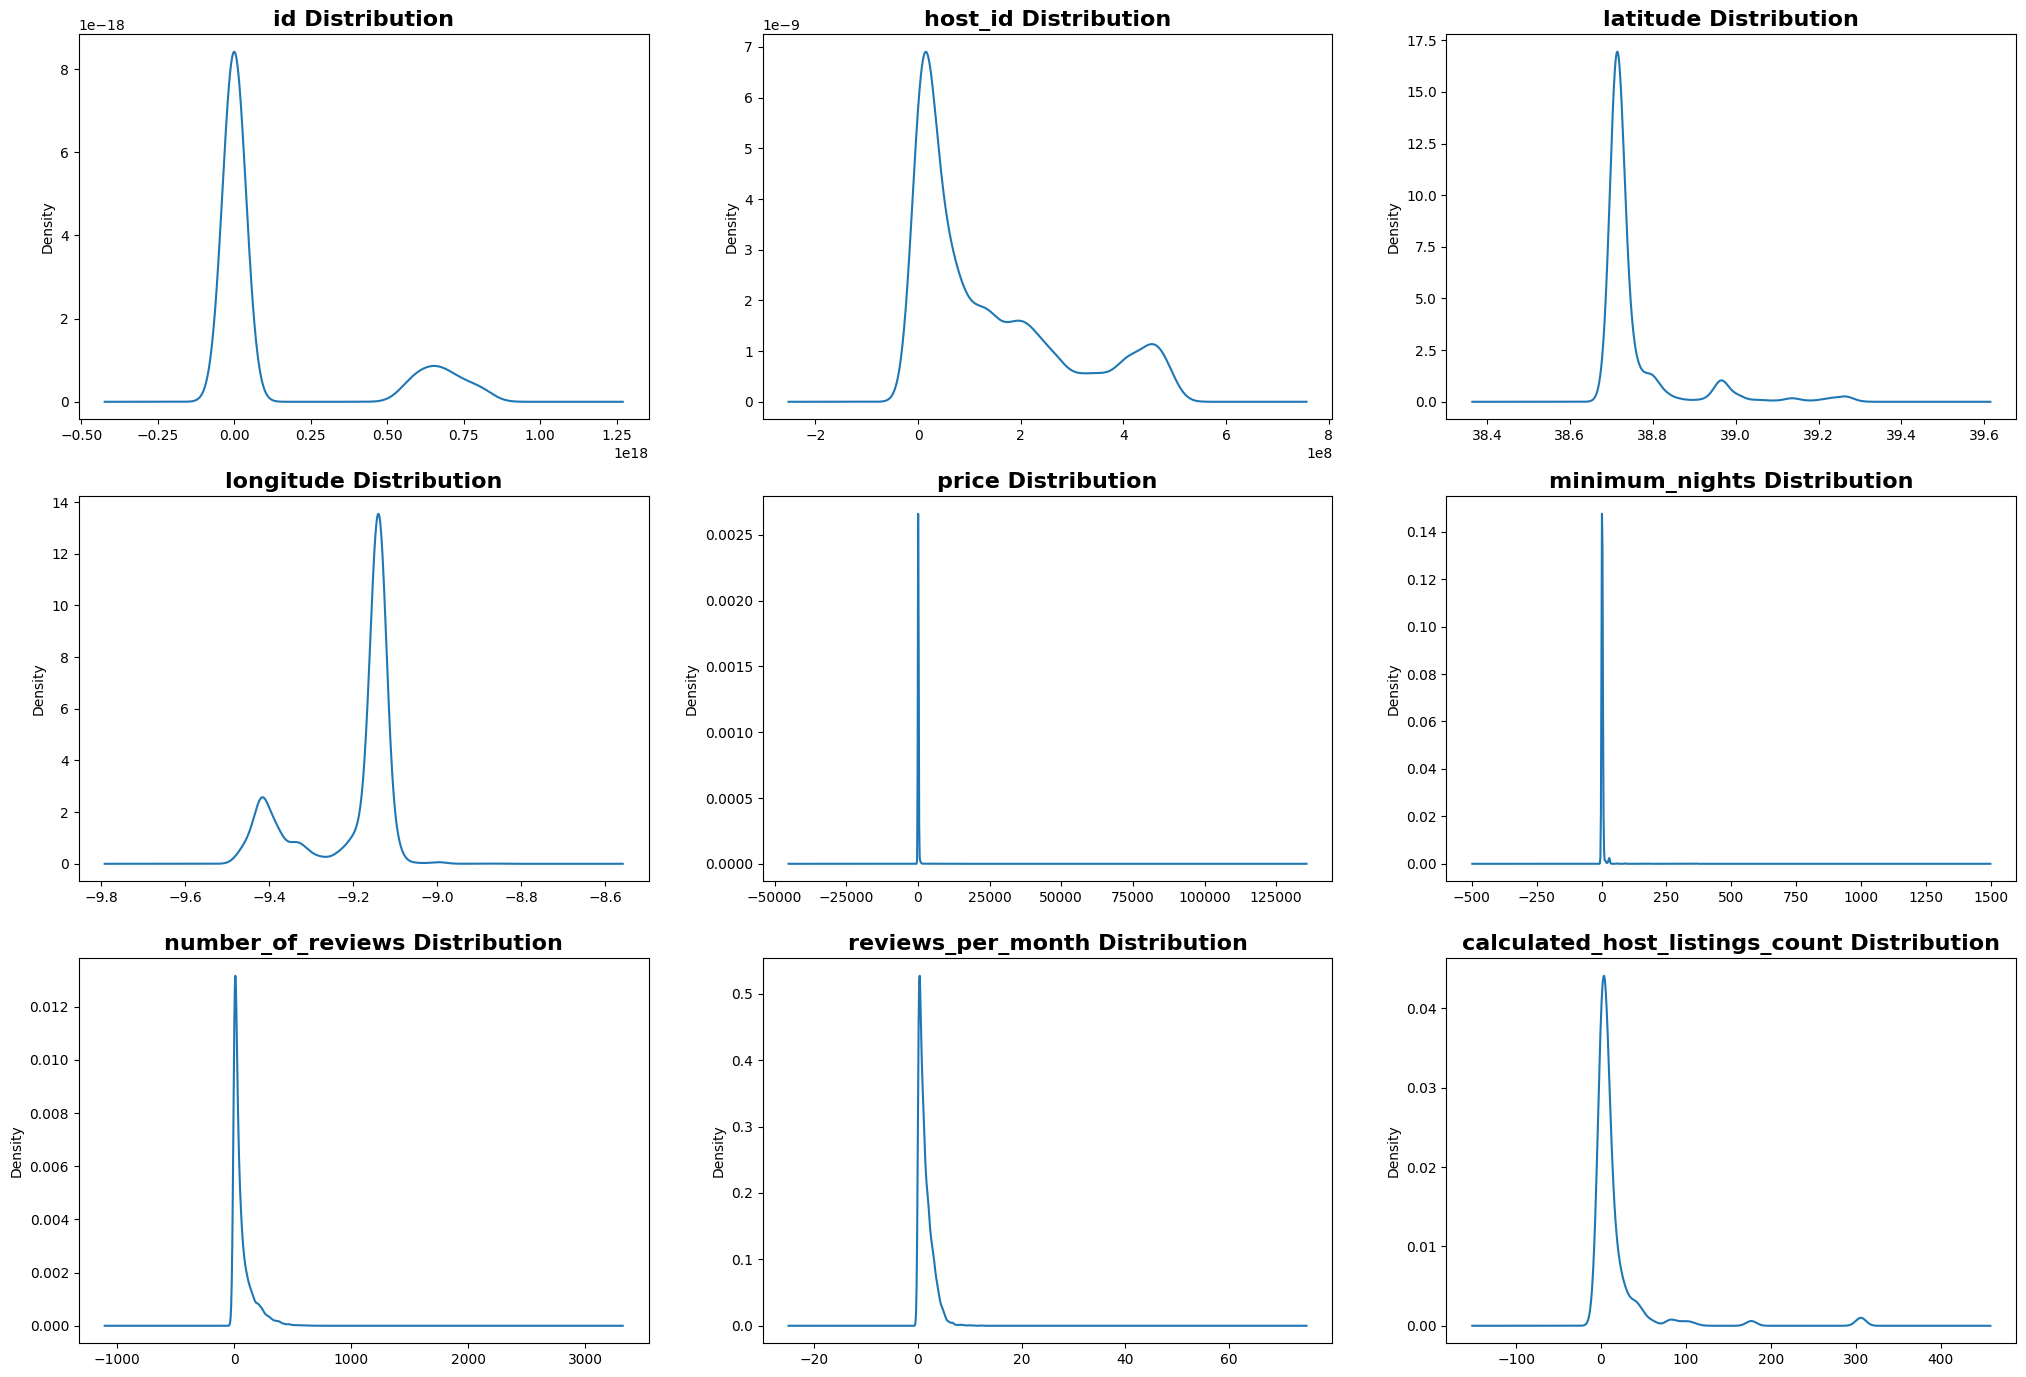

In [19]:
#create denisty plot for [M]
fig, axes = plt.subplots(nrows=3, ncols=3)
aux = 0
fig.set_figheight(17)
fig.set_figwidth(25)
for row in axes:
    for col in row:
        listings_df1[numeric_features[aux]].plot(kind='kde',ax=col)
        col.set_title(numeric_features[aux] +' Distribution',fontsize=16,fontweight='bold')
        aux+=1

In [20]:
percentile75 = listings_df1['price'].quantile(.75)
percentile25 = listings_df1['price'].quantile(.25)
print("\n 75% Quantile :- ",percentile75)
print("\n 25% Quantile :- ",percentile25)


 75% Quantile :-  130.0

 25% Quantile :-  61.0


In [21]:
#Removing the outlier usine IQR Based Filtering, because of the skewed distribution
iqr = np.subtract(*np.percentile(listings_df1['price'], [75, 25]))
iqr

69.0

In [22]:
#Finding the upper and lower limits
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [23]:
listings_df2 = listings_df1[listings_df1['price'].between(percentile25, percentile75, inclusive='both')]
listings_df2 = listings_df2[listings_df2['number_of_reviews'] > 0]
listings_df2 = listings_df2[listings_df2['calculated_host_listings_count'] < 10]
listings_df2 = listings_df2[listings_df2['number_of_reviews'] < 200]
listings_df2 = listings_df2[listings_df2['minimum_nights'] < 10]
listings_df2 = listings_df2[listings_df2['reviews_per_month'] < 5]

## Correlation

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'id'),
  Text(1.5, 0, 'host_id'),
  Text(2.5, 0, 'latitude'),
  Text(3.5, 0, 'longitude'),
  Text(4.5, 0, 'price'),
  Text(5.5, 0, 'minimum_nights'),
  Text(6.5, 0, 'number_of_reviews'),
  Text(7.5, 0, 'reviews_per_month'),
  Text(8.5, 0, 'calculated_host_listings_count'),
  Text(9.5, 0, 'availability_365')])

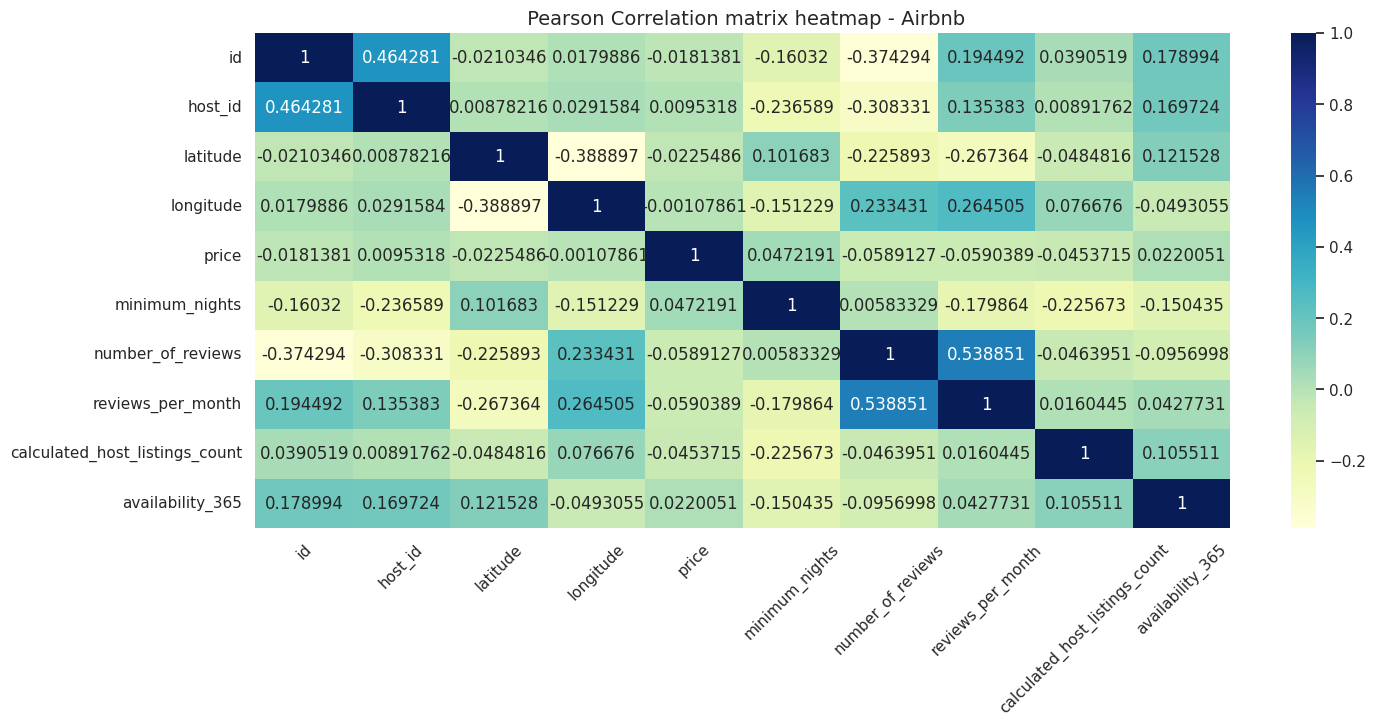

In [24]:
#correlation with data 'listings_df2'

import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
corr_map = listings_df2.corr()
sns.heatmap(corr_map,annot=True, cmap='YlGnBu',fmt='g')
plt.title(" Pearson Correlation matrix heatmap - Airbnb", size=14)
plt.tight_layout()
plt.xticks(rotation=45)

#plt.savefig('heatmap_airbnb.jpg',dpi=150, figsize=(15,8))

In [25]:
# what is +ve correlated with price [AV]
pos_corr = corr_map['price'] > 0
corr_map['price'][pos_corr].sort_values(ascending = False).to_frame()

,price
price,1.000000
minimum_nights,0.047219
availability_365,0.022005
host_id,0.009532


## Clusterization

In [26]:
MapModel = listings_df2[['latitude', 'longitude']]

In [27]:
#Using the clustering model and visualizer model
model = KMeans()
kmeans = KMeans(n_clusters = 15, random_state=42).fit(MapModel)
kmeans.cluster_centers_
cluster_map = folium.Map([38.736946, -9.142685], zoom_start=7)
for i in range(kmeans.cluster_centers_.shape[0]):
    num = sum(kmeans.labels_ == i)
    folium.CircleMarker([kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1]],
                        radius=15,
                        popup=str(num) + ' Listings Associated with this Cluster',
                        fill_color="#3db7e4",
                        ).add_to(cluster_map)

In [28]:
cluster_map

## Check numeric fields distribution

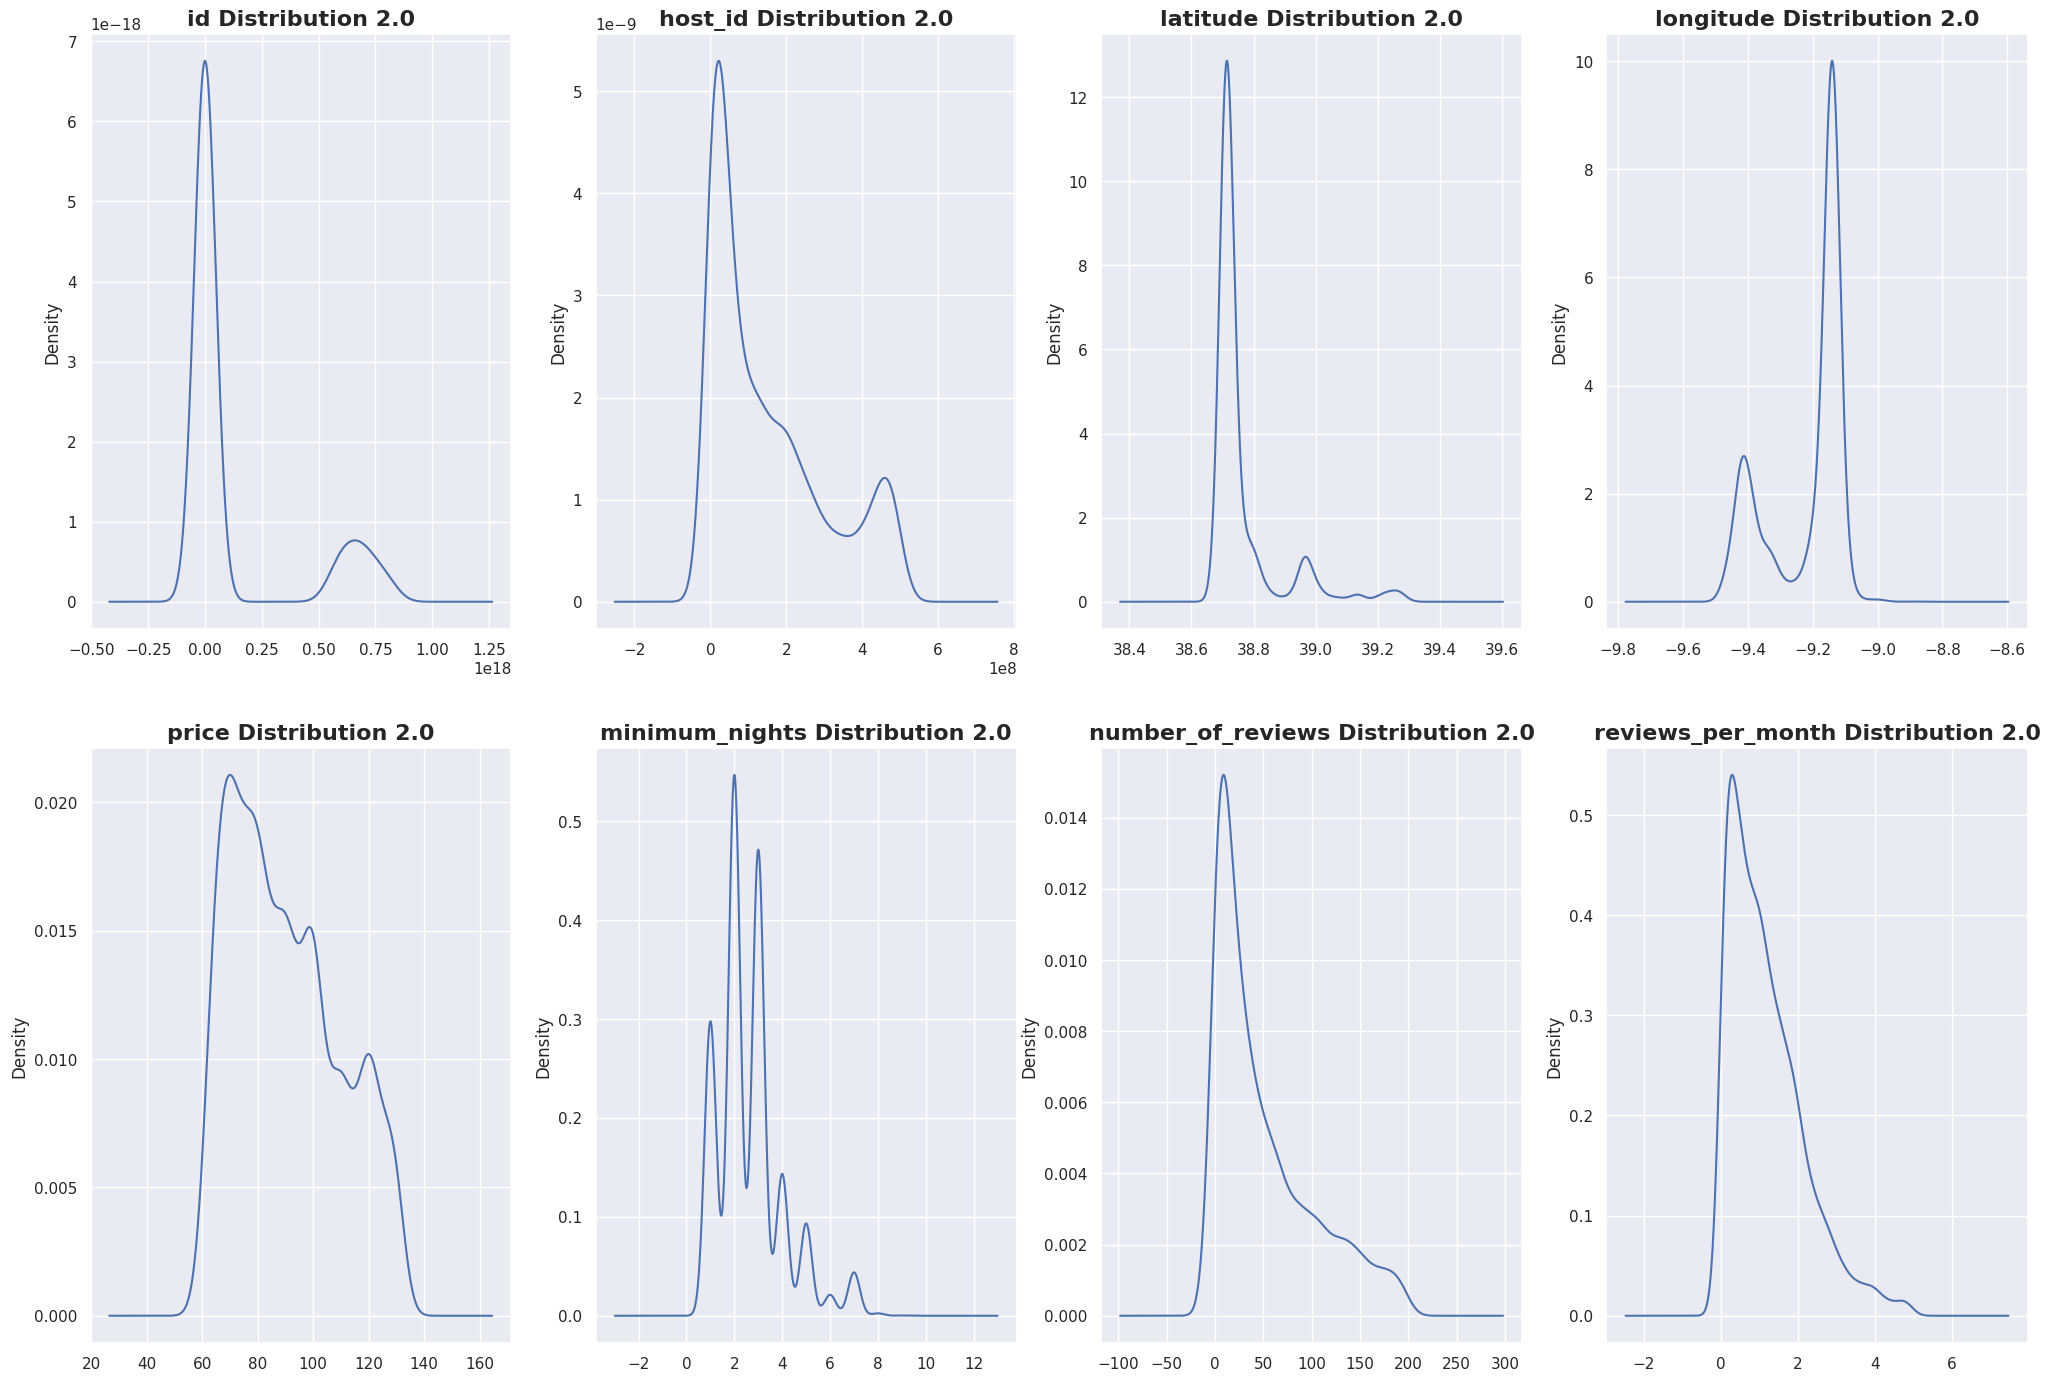

In [29]:
# Check the numeric feature distribution after all transformations
fig, axes = plt.subplots(nrows=2, ncols=4)
aux = 0
fig.set_figheight(17)
fig.set_figwidth(25)
for row in axes:
    for col in row:
        listings_df2[numeric_features[aux]].plot(kind='kde',ax=col)
        col.set_title(numeric_features[aux] +' Distribution 2.0',fontsize=16,fontweight='bold')
        aux+=1

Text(0.5, 1.0, 'Missing Values Proportion')

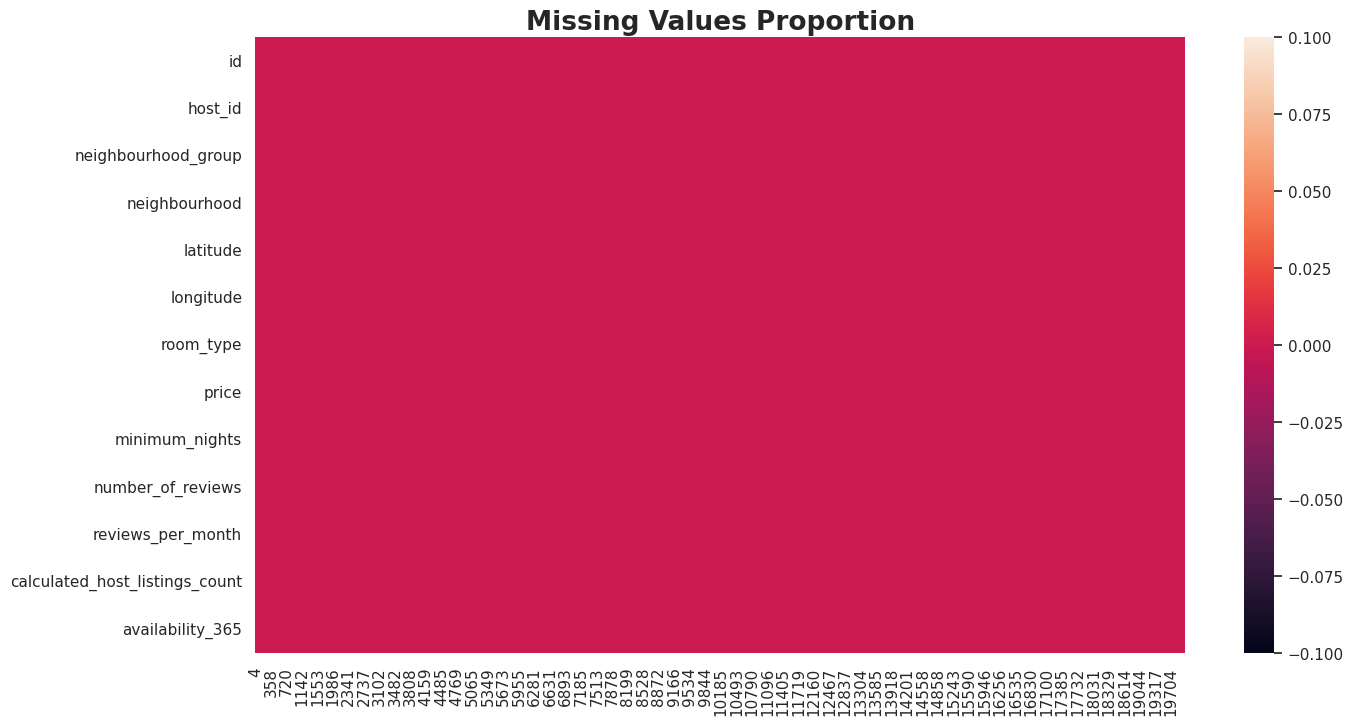

In [30]:
#checkung the missing values 
ax = sns.heatmap(listings_df2.isna().T)
ax.set_title('Missing Values Proportion',fontsize=19,fontweight='bold')

In [31]:
#downloading the transformed dataset
listings_df2.to_csv('cleaned data')

##Top Listing count

In [32]:
#Total number of airbnb listings in the US [PS]
total_list= listings_df2['host_id'].value_counts().sum()
print("Total count of listings in Lisbon :", total_list)

Total count of listings in Lisbon : 5275


In [33]:
#list of hosts with top airbnb listing [PS]
top_host_id = listings_df2['host_id'].value_counts().head(10)
print("Top 10 Airbnb Hosts in Lisbon \n", top_host_id)
print("Total count of listings by top 10 hosts :", sum(top_host_id))

Top 10 Airbnb Hosts in Lisbon 
 137264280    9
481098345    9
43326716     9
175419917    8
48045283     8
123366549    8
206315701    8
8839058      8
491310248    8
124462320    8
Name: host_id, dtype: int64
Total count of listings by top 10 hosts : 83


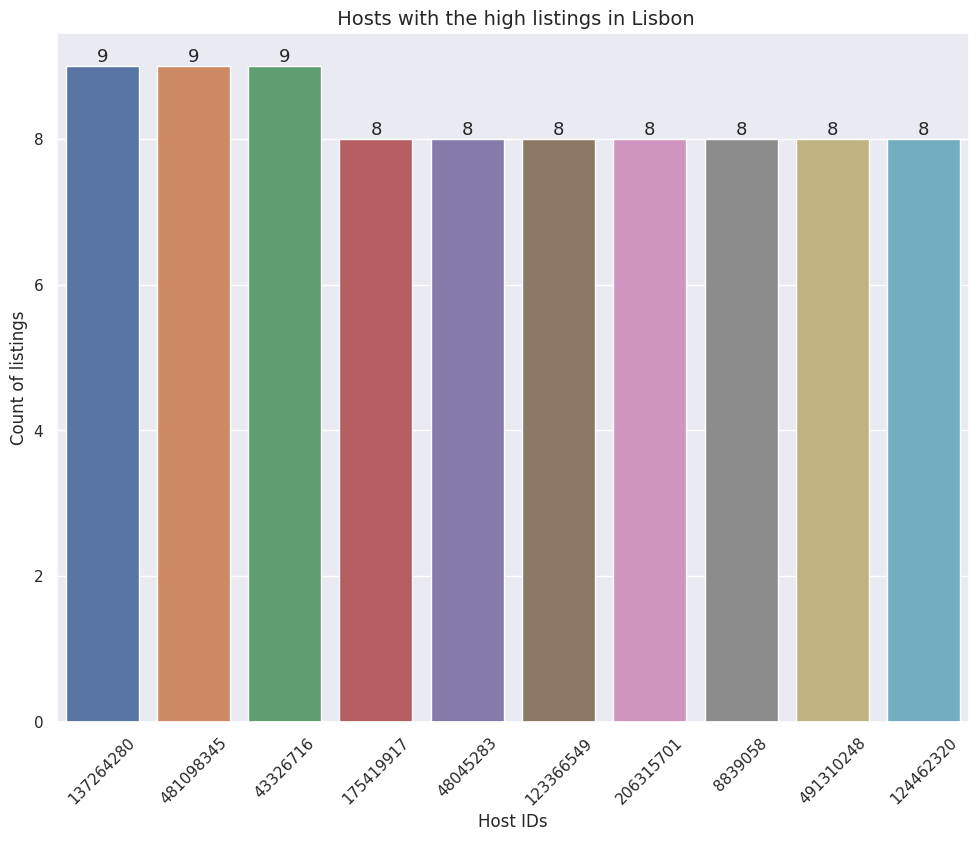

In [34]:
#plotting graph of Hosts with the high listings in Lisbon [PS]
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(x="host_id", data=listings_df2, order=listings_df2.host_id.value_counts().head(10).index),
plt.title(" Hosts with the high listings in Lisbon", size=14)
plt.xlabel('Host IDs')
plt.ylabel('Count of listings')
plt.tight_layout()
plt.xticks(rotation=45)
#data value labels 
for index, data in enumerate(top_host_id):
  plt.text(x=index, y=data, s=f"{data}", ha='center',va='bottom', fontsize=13 )

## Map Visualization

### Map based on Listing

In [35]:
#[PS]
print("Disctrict : ", listings_df2['neighbourhood'].nunique())
print("\nCity :-  \n\n", listings_df2['neighbourhood_group'].unique())
print("\nRoom Type :-  \n\n", listings_df2['room_type'].unique())

Disctrict :  111

City :-  

 ['Lisboa' 'Sintra' 'Cascais' 'Mafra' 'Torres Vedras' 'Amadora' 'Odivelas'
 'Lourinh' 'Cadaval' 'Vila Franca De Xira' 'Alenquer' 'Oeiras' 'Loures'
 'Arruda Dos Vinhos' 'Sobral De Monte Agrao' 'Azambuja']

Room Type :-  

 ['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']


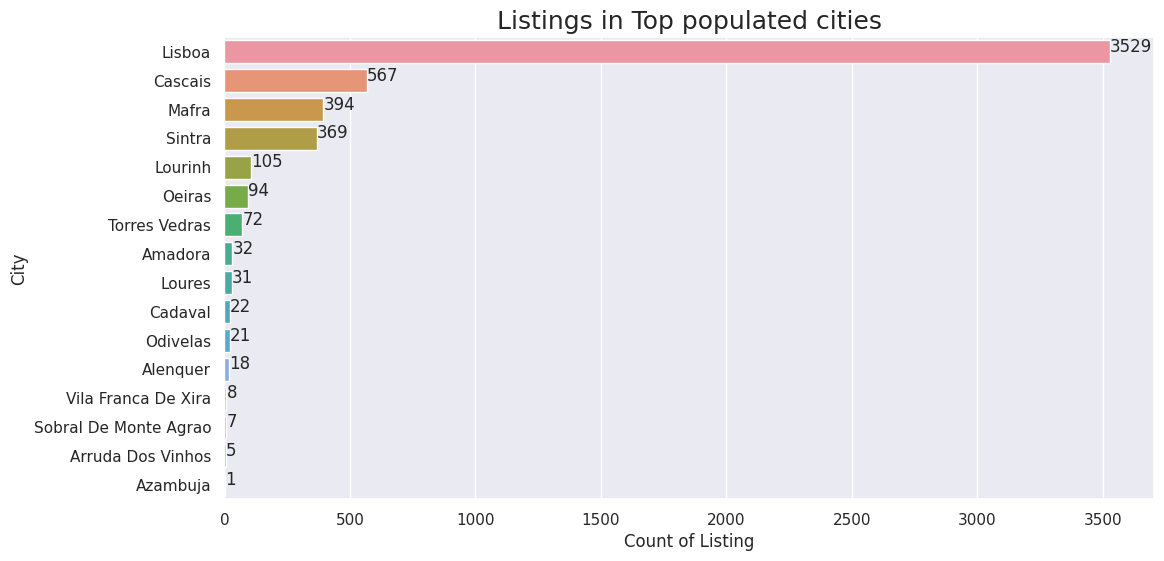

In [36]:
#Listings in Top populated neighbourhood_group [PS]

city_count = listings_df2.neighbourhood_group.value_counts().iloc[:20]

sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(y="neighbourhood_group", data=listings_df2, order=listings_df2.neighbourhood_group.value_counts().iloc[:20].index)
plt.title("Listings in Top populated cities", size=18)
plt.xlabel('Count of Listing')
plt.ylabel('City')

#data value labels 
for index, data in enumerate(city_count):
  plt.text(x=data, y=index, s=f"{data}")

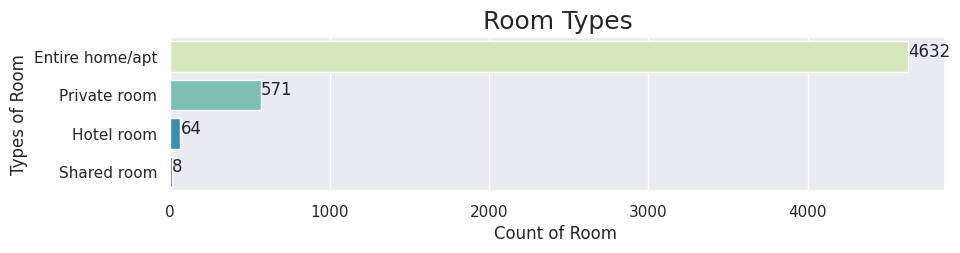

In [37]:
# Distribution of room types [PS]

rm_count = listings_df2.room_type.value_counts()

sns.set(rc={'figure.figsize':(10,2)})
sns.countplot(y="room_type", data=listings_df2, order=listings_df2.room_type.value_counts().iloc[:20].index, palette="YlGnBu")
plt.title("Room Types", size=18)
plt.xlabel('Count of Room ')
plt.ylabel('Types of Room')

#data value labels 
for index, data in enumerate(rm_count):
  plt.text(x=data, y=index, s=f"{data}")

### Map based on Price

In [38]:
import sys
print(sys.getrecursionlimit())

1000


In [39]:
#checking mean [lat, long] [PS]
print("latitude :", listings_df2.latitude.mean())
print("longitude :", listings_df2.longitude.mean())

latitude : 38.763736959818324
longitude : -9.216711347920159


In [40]:
# Sicne mean [lat ,long] is in decimal setting the coordinates [QY]

coord = [38.736946, -9]

#airbnb listings on map without price outliers
map_folium = folium.Map(location = coord, zoom_start=9, tiles="OpenStreetMap", control_scale=True)
map_folium

#mapping price based on area
my_zip1 = zip(listings_df2['latitude'], listings_df2['longitude'], listings_df2['price'])
list_of_my_zip1 = list(my_zip1)

hm_layer1 = HeatMap(list_of_my_zip1,
                   min_opacity=0.1,
                   radius=6,
                   blur=4, 
                 )

map_folium.add_child(hm_layer1)
map_folium

In [41]:
#Boxplot - Lisbon
df_lisb = listings_df2[(listings_df2["neighbourhood_group"] == "Lisboa")]

fig_lisb = px.box(df_lisb, y = "price", 
             color = "room_type", 
             title = "AirBnB Price Distribution of Lisbon")
fig_lisb.show(renderer="colab")

## **Modeling**

In [42]:
#Data prep
# Tranferring data to new dataframe for modeling
listings_df3 = listings_df2
listings_df3.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
4,26093410,348308512,Lisboa,Santo Antnio,38.720410,-9.14435,Entire home/apt,110,3,1,0.02,4,0
8,828100180035815839,271087308,Lisboa,Belm,38.697897,-9.19723,Entire home/apt,65,2,1,1.00,7,336
10,45444277,358761513,Lisboa,Santa Maria Maior,38.711110,-9.13890,Entire home/apt,111,2,70,3.61,3,25
14,18506823,128442020,Lisboa,Misericrdia,38.711960,-9.15032,Private room,63,1,145,2.04,1,298
15,12784345,66804878,Lisboa,Alvalade,38.750560,-9.15428,Entire home/apt,70,2,133,1.59,1,180


In [43]:
print(numeric_features) # numbers
nominal_features 

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


,neighbourhood_group,neighbourhood,room_type
0,Lisboa,Santa Maria Maior,Entire home/apt
3,Lisboa,Santa Maria Maior,Entire home/apt
4,Lisboa,Santo Antnio,Entire home/apt
5,Lisboa,So Vicente,Entire home/apt
6,Lisboa,Santa Maria Maior,Entire home/apt
...,...,...,...
20092,Lisboa,Beato,Entire home/apt
20093,Lisboa,So Vicente,Entire home/apt
20094,Lisboa,So Vicente,Entire home/apt
20095,Lisboa,Arroios,Entire home/apt


In [44]:
#Converting nominal features into numbers using Label Encoder

for i in nominal_features:
  listings_df3[i] = listings_df3[i].astype('category')
#  instance of Label Encoder
le = LabelEncoder()
# fit_transform function to fit label
for i in nominal_features:
  listings_df3[i] = le.fit_transform(listings_df3[i])

listings_df3 = listings_df2
listings_df3.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
4,26093410,348308512,6,86,38.720410,-9.14435,0,110,3,1,0.02,4,0
8,828100180035815839,271087308,6,20,38.697897,-9.19723,0,65,2,1,1.00,7,336
10,45444277,358761513,6,84,38.711110,-9.13890,0,111,2,70,3.61,3,25
14,18506823,128442020,6,59,38.711960,-9.15032,2,63,1,145,2.04,1,298
15,12784345,66804878,6,12,38.750560,-9.15428,0,70,2,133,1.59,1,180


In [45]:
#train test data
listings_master = listings_df3[['price', 'calculated_host_listings_count','availability_365', 'room_type', 'neighbourhood_group', 'neighbourhood','minimum_nights','number_of_reviews','reviews_per_month']].reset_index(drop=True)
listings_master.head()

,price,calculated_host_listings_count,availability_365,room_type,neighbourhood_group,neighbourhood,minimum_nights,number_of_reviews,reviews_per_month
0,110,4,0,0,6,86,3,1,0.02
1,65,7,336,0,6,20,2,1,1.00
2,111,3,25,0,6,84,2,70,3.61
3,63,1,298,2,6,59,1,145,2.04
4,70,1,180,0,6,12,2,133,1.59


### Linear Regression

In [46]:
X = listings_master.drop('price', axis=1)
y = listings_master['price']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X ,y , test_size=0.20, random_state=42)

In [48]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
model_lr.fit(X_train,np.ravel(y_train))
#Predications LinearRegression
Y_pred_model_lr=model_lr.predict(X_test)
Y_pred_model_lr

array([90.68788461, 86.52681738, 92.19265421, ..., 92.73914462,
       92.27328877, 92.85422263])

In [49]:
#Root Mean Squared Error calc
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_test, Y_pred_model_lr))
print(f"Linear Regression Model RMSE: {round(RMSE, 4)}")

Linear Regression Model RMSE: 19.4078


In [50]:
#Mean Squared Error calc
from sklearn.metrics import mean_absolute_error
MEA = mean_absolute_error(y_test, Y_pred_model_lr)
print(f"Linear Regression Model MAE: {round(MEA, 4)}")

Linear Regression Model MAE: 16.4783


In [51]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, Y_pred_model_lr)
print('Linear Regression Model R2 Score',r2)

Linear Regression Model R2 Score 0.026188176630605797


In [52]:
linear_reg_pred = pd.DataFrame({"og_Price": y_test.values, "predicted_Price": Y_pred_model_lr})
linear_reg_pred.head(10)

,og_Price,predicted_Price
0,90,90.687885
1,71,86.526817
2,110,92.192654
3,100,93.078098
4,117,88.539230
5,75,91.375108
6,110,88.402476
7,114,93.327148
8,82,90.534327
9,119,90.115882


Text(0.5, 1.0, 'LinearRegression')

<Figure size 2000x827 with 0 Axes>

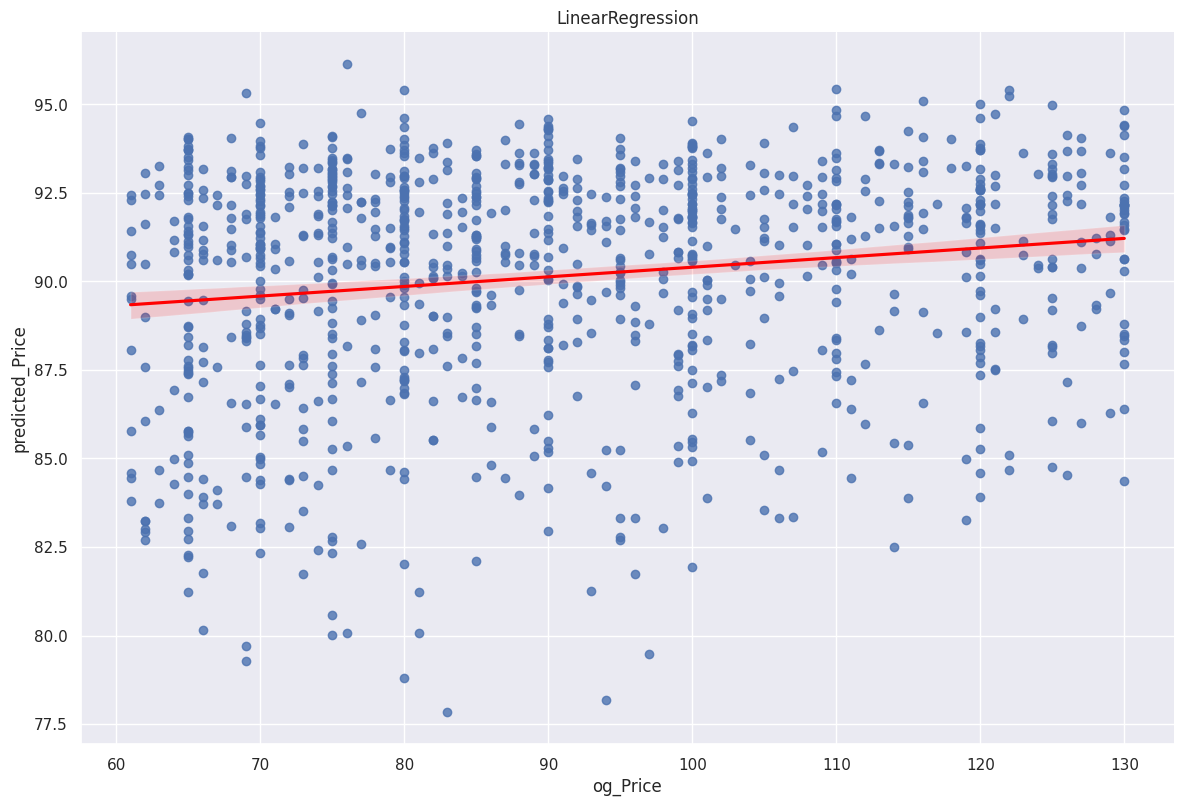

In [59]:
plt.figure(figsize=(20, 8.27))
sns.lmplot(x="og_Price",y="predicted_Price",data=linear_reg_pred,  palette="Set1",height=8, aspect=1.5,line_kws={'color': 'red'})

plt.title('LinearRegression')

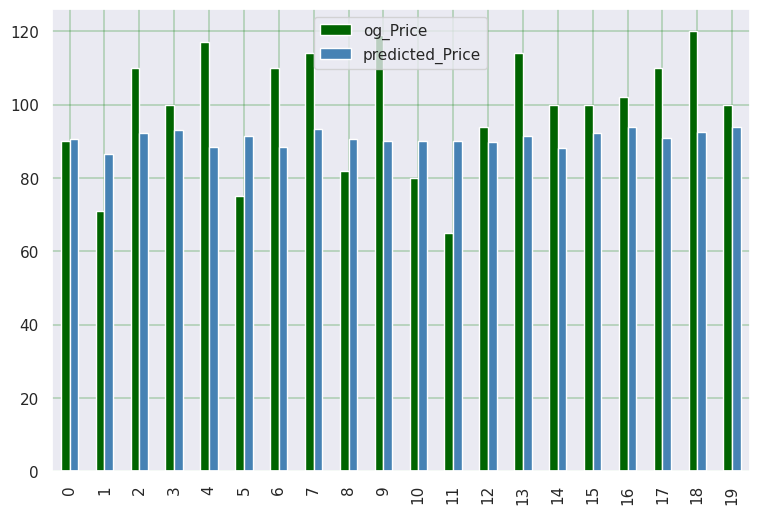

In [61]:
#comparison 
first20preds=linear_reg_pred.head(20)
c='darkgreen', 'steelblue'
first20preds.plot(kind='bar',figsize=(9,6), color=c)
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [62]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred_model_lr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred_model_lr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred_model_lr)))

Mean Absolute Error: 16.478284889702582
Mean Squared Error: 376.662402478936
Root Mean Squared Error: 19.407792313370834


```
The above linear regression model is not ideal.
Changes to test size and random state did not impact the results.

```



### Multiple Reression

In [63]:
listings_df3

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
4,26093410,348308512,6,86,38.720410,-9.14435,0,110,3,1,0.02,4,0
8,828100180035815839,271087308,6,20,38.697897,-9.19723,0,65,2,1,1.00,7,336
10,45444277,358761513,6,84,38.711110,-9.13890,0,111,2,70,3.61,3,25
14,18506823,128442020,6,59,38.711960,-9.15032,2,63,1,145,2.04,1,298
15,12784345,66804878,6,12,38.750560,-9.15428,0,70,2,133,1.59,1,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20076,27821336,210086005,6,16,38.728040,-9.14839,0,72,2,110,1.99,1,106
20082,39432386,141586881,6,86,38.716480,-9.14452,2,94,1,23,0.57,8,300
20087,49852931,4141894,6,84,38.713940,-9.14114,0,117,2,56,2.57,5,309
20088,32558334,244586451,6,14,38.723510,-9.13463,0,102,3,69,1.43,1,204


In [64]:
#multiple regression

X_ = listings_master.drop('price', axis=1)
y = listings_master['price']

# with sklearn
regr = LinearRegression()
regr.fit(X_, y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  93.27808619260728
Coefficients:  [-0.04270261  0.00670827 -4.5262954  -0.19630511  0.01157608  0.07419459
 -0.02368401 -1.1598088 ]
LinearRegression()


In [65]:
y_pred2 = regr.predict(X_)

In [66]:
dfmult= pd.DataFrame({'Actual': y, 'Predicted': y_pred2.flatten()})
dfmult

,Actual,Predicted
0,110,93.100691
1,65,93.251733
2,111,87.415843
3,63,79.961017
4,70,88.558273
...,...,...
5270,72,88.188975
5271,94,84.582438
5272,117,90.773363
5273,102,90.517965


In [67]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred2)))

Root Mean Squared Error: 19.11787733935892


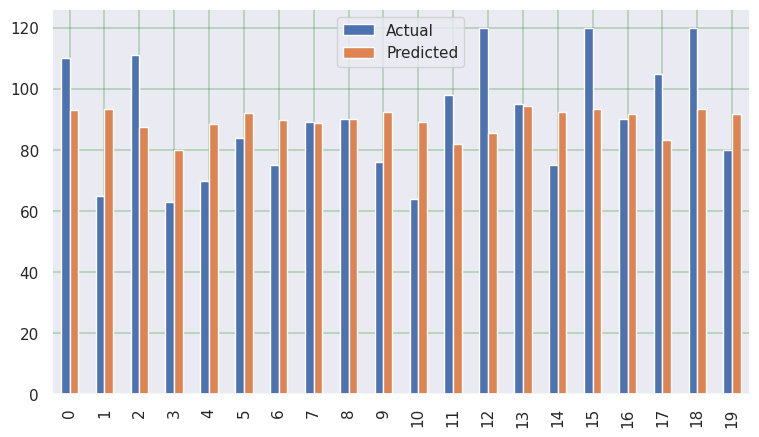

In [68]:
#comparison 
first20preds2=dfmult.head(20)
first20preds2.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [111]:
first20preds2

,Actual,Predicted
0,110,93.100691
1,65,93.251733
2,111,87.415843
3,63,79.961017
4,70,88.558273
5,84,92.187413
6,75,89.861749
7,89,88.811934
8,90,90.297437
9,76,92.318130


In [113]:
linear_reg_pred.to_csv('predicted_lin.csv') 

In [112]:
dfmult

,og_Price,predicted_Price
0,90,90.687885
1,71,86.526817
2,110,92.192654
3,100,93.078098
4,117,88.539230
...,...,...
1050,109,92.950627
1051,85,86.978336
1052,120,92.739145
1053,113,92.273289


In [114]:
dfmult.to_csv('multipl.csv')